In [1]:
import sys
import requests
from bs4 import BeautifulSoup
import pandas
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.special import comb
from scipy.stats import spearmanr
import statistics

**Created by:** Saumya Sharma, ss2944@cornell.edu
**Date:** June 20, 2020

In [257]:
df= pandas.read_csv('Quotes.csv')

# Abstract

The following document consists of a handmade dataset filled with information from Urban Airship. Specifically, it contains the dates of information sent for the past year and the observations according to the following preview:

In [3]:
df.head()

,Date,Day,Total Alerting Sends,Direct #,Silent Sends,Direct %,Attributed %,Attributed #,Text,Quote
0,7/16/19,Tues,88,6,63,7.5,12.5,10,"If you don't have any shadows, you're not in t...",1
1,7/18/19,Thurs,1021,22,102,3.0,9.8,72,Almost the weekend! What have you knocked out ...,0
2,7/22/19,Mon,1010,17,103,2.3,5.5,40,I am a woman with thoughts & questions & shit ...,1
3,7/23/19,Tues,1022,21,103,2.9,8.4,62,What are you proud of this week? P.S. You're a...,0
4,7/26/19,Fri,1039,22,101,3.0,6.8,50,It's a big happy Fri-YAY! What's your biggest ...,0


We find that push notifications containing quotes are less effective than other types of notifications at resulting in app interaction. That being said, quotes may be useful in a way not measurable by its dataset. For example, quote notifications may keep app engagement front of mind in a user or encourages them to have a good day at work. Therefore, an ideal strategy derived from this data involves a mix between quotes and other types of messages.

Additionally, we find that engagement is higher on Tuesdays and Thursdays and lowest on Monday, Wednesday, and Saturday. This can be used to our advantage because we can attempt to bolster engagement on the stronger days.

## Next Steps

From this finding, we have two next steps:
* Finding out which type of quotes initiate a greater response
* Which type of non-quotes initiate a greater reponse

# How does quotes impact engagement?

## Creating Dataset 
The following cells will create an additional column `Weekend`, where 0 is not a weekend and 1 is a weekend. This is to allow us to better understand the data and see if there are anomalies.

In [262]:
def is_day(s):
    if s == 'Sat' or s=='Sun':
        return 1
    else:
        return 0

In [263]:
df['Weekend']= df['Day'].map(is_day)

In [261]:
df.head()

,Date,Day,Total Alerting Sends,Direct #,Silent Sends,Direct %,Attributed %,Attributed #,Text,Quote,Weekend
0,7/16/19,Tues,88,6,63,7.5,12.5,10,"If you don't have any shadows, you're not in t...",1,0
1,7/18/19,Thurs,1021,22,102,3.0,9.8,72,Almost the weekend! What have you knocked out ...,0,0
2,7/22/19,Mon,1010,17,103,2.3,5.5,40,I am a woman with thoughts & questions & shit ...,1,0
3,7/23/19,Tues,1022,21,103,2.9,8.4,62,What are you proud of this week? P.S. You're a...,0,0
4,7/26/19,Fri,1039,22,101,3.0,6.8,50,It's a big happy Fri-YAY! What's your biggest ...,0,0


## No Quotes

In [265]:
df1 =df[df['Quote']==0][:]
df1.drop(columns = ['Date', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends']).describe()

,Direct %,Attributed %,Quote,Weekend
count,51.000000,51.000000,51.0,51.0
mean,1.549020,3.835294,0.0,0.0
std,0.660416,1.965688,0.0,0.0
min,0.300000,0.600000,0.0,0.0
25%,1.200000,2.450000,0.0,0.0
50%,1.400000,3.500000,0.0,0.0
75%,2.000000,4.900000,0.0,0.0
max,3.000000,9.800000,0.0,0.0


## Quotes

In [267]:
df1 =df[df['Quote']==1][:]
df1.drop(columns = ['Date', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends']).describe()

,Direct %,Attributed %,Quote,Weekend
count,51.000000,51.000000,51.0,51.000000
mean,1.390196,3.005882,1.0,0.058824
std,0.991212,1.821144,0.0,0.237635
min,0.200000,0.000000,1.0,0.000000
25%,1.000000,2.100000,1.0,0.000000
50%,1.200000,2.700000,1.0,0.000000
75%,1.500000,3.550000,1.0,0.000000
max,7.500000,12.500000,1.0,1.000000


We can see that that all non-quote notifications are done on weekdays, while some quote posts are done on weekends. We can therefore remove the non-weekend quotes in an attempt to better understand the data. 

# Determining impact after removing weekends

## No Quotes Without Weekends

In [172]:
df1 =df[df['Quote']==0][:]
df0 = df1[df1['Weekend']==0][:]
df2 = df0.drop(columns = ['Date', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends','Weekend'])
df2.describe()

,Direct %,Attributed %,Quote
count,51.000000,51.000000,51.0
mean,1.549020,3.835294,0.0
std,0.660416,1.965688,0.0
min,0.300000,0.600000,0.0
25%,1.200000,2.450000,0.0
50%,1.400000,3.500000,0.0
75%,2.000000,4.900000,0.0
max,3.000000,9.800000,0.0


## Quotes Without Weekends

In [173]:
df1 =df[df['Quote']==1][:]
df0 = df1[df1['Weekend']==0][:]
df2 = df0.drop(columns = ['Date', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends','Weekend'])
df2.describe()

,Direct %,Attributed %,Quote
count,48.000000,48.000000,48.0
mean,1.391667,3.031250,1.0
std,1.019769,1.865037,0.0
min,0.200000,0.000000,1.0
25%,1.000000,2.150000,1.0
50%,1.200000,2.750000,1.0
75%,1.500000,3.625000,1.0
max,7.500000,12.500000,1.0


### Comparison of Non-Quotes Versus Quote
#### Direct %
(mean, median)

*Not Quote*:
(1.549, 1.4)

*Quote*:
(1.398, 1.2)

#### Attributed %
*Not Quote*:
(3.835, 3.5)

*Quote*:
(3.034, 2.75)

#### Range
(min, max)

*Not Quote*:
(0.3, 3)

*Quote*:
(0.2, 7.5)

From each of these values, we see that the quote notifications consistently performs worse. When looking at the direct response percentages, we can see that Quotes have a value of approximately 1.3 and Non-Quotes have a percentage of approximately 1.5. When looking at attributed response percentages, Quotes are about 3, while Non-Quotes are approximate 3.6.

## Noticing this Trend Visually

### Direct %

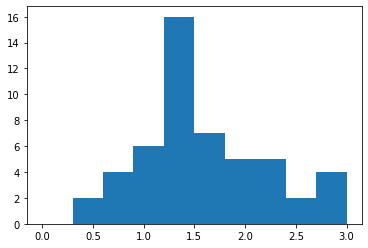

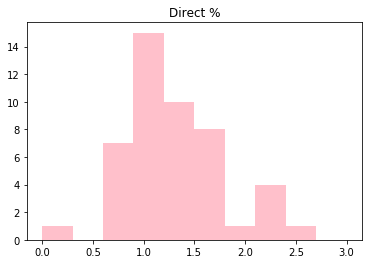

In [174]:
df1 =df[df['Quote']==0][:]
df0 = df1[df1['Weekend']==0][:]
df2 = df0.drop(columns = ['Date', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends','Weekend'])
plt.hist(df2['Direct %'], range=(0,3))
plt.show()

df1 =df[df['Quote']==1][:]
df0 = df1[df1['Weekend']==0][:]
df2 = df0.drop(columns = ['Date', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends','Weekend'])
plt.hist(df2['Direct %'], range=(0,3), color='pink')


plt.title('Direct %')

plt.show()


### Combining the Graphs

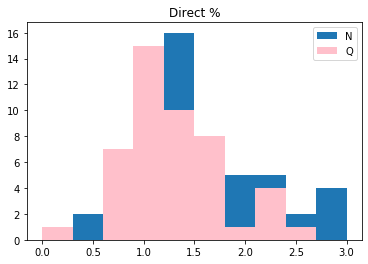

In [175]:
df1 =df[df['Quote']==0][:]
df0 = df1[df1['Weekend']==0][:]
df2 = df0.drop(columns = ['Date', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends','Weekend'])
plt.hist(df2['Direct %'], range=(0,3))

df1 =df[df['Quote']==1][:]
df0 = df1[df1['Weekend']==0][:]
df2 = df0.drop(columns = ['Date', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends','Weekend'])
plt.hist(df2['Direct %'], range=(0,3), color='pink')

plt.legend('NQ')
plt.title('Direct %')


plt.show()

When we overlay the graphs, we can see that the blue graph, of non-quotes, performs better than the pink graph of quotes.

## Attributed %

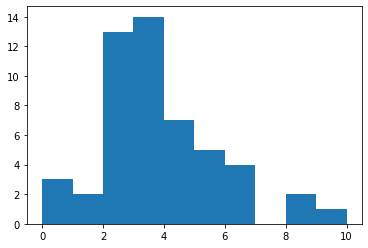

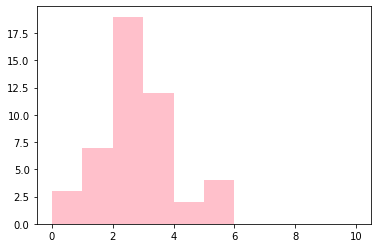

In [176]:
df1 =df[df['Quote']==0][:]
df0 = df1[df1['Weekend']==0][:]
df2 = df0.drop(columns = ['Date', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends','Weekend'])
plt.hist(df2['Attributed %'], range=(0,10))
plt.show()

df1 =df[df['Quote']==1][:]
df0 = df1[df1['Weekend']==0][:]
df2 = df0.drop(columns = ['Date', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends','Weekend'])
plt.hist(df2['Attributed %'], range=(0,10), color='pink')


plt.show()


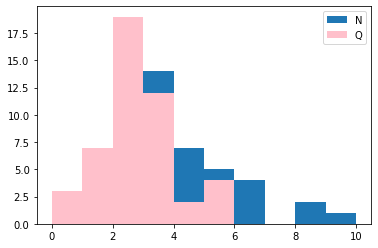

In [177]:
df1 =df[df['Quote']==0][:]
df0 = df1[df1['Weekend']==0][:]
df2 = df0.drop(columns = ['Date', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends','Weekend'])
plt.hist(df2['Attributed %'], range=(0,10))


df1 =df[df['Quote']==1][:]
df0 = df1[df1['Weekend']==0][:]
df2 = df0.drop(columns = ['Date', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends','Weekend'])
plt.hist(df2['Attributed %'], range=(0,10), color='pink')

plt.legend('NQ')

plt.show()


We can again see how the Quotes perform less than non-quotes.

# Day: Quote v Non-Quote

In this data, we hoped to determine if certain types of notifications were more popular on certain days. This line of analysis was unfortunately not helpful because there is a preference in when quotes are posted and the sample size was not large enough to determine any type of relationship. Below is the analysis.

### Monday

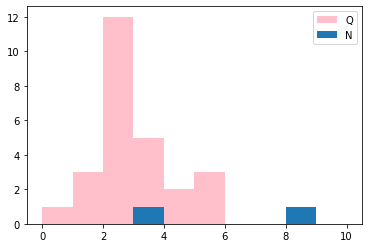

In [178]:
df1 =df[df['Quote']==1][:]
df0 = df1[df1['Day']=='Mon'][:]
df2 = df0.drop(columns = ['Date', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends','Weekend'])
plt.hist(df2['Attributed %'], range=(0,10), color='pink')

df1 =df[df['Quote']==0][:]
df0 = df1[df1['Day']=='Mon'][:]
df2 = df0.drop(columns = ['Date', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends','Weekend'])
plt.hist(df2['Attributed %'], range=(0,10))


plt.legend('QN')

plt.show()


### Tuesday

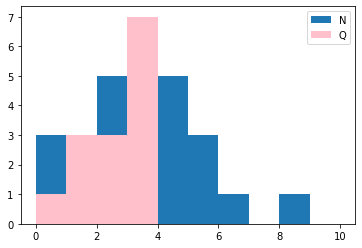

In [179]:
df1 =df[df['Quote']==0][:]
df0 = df1[df1['Day']=='Tues'][:]
df2 = df0.drop(columns = ['Date', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends','Weekend'])
plt.hist(df2['Attributed %'], range=(0,10))

df1 =df[df['Quote']==1][:]
df0 = df1[df1['Day']=='Tues'][:]
df2 = df0.drop(columns = ['Date', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends','Weekend'])
plt.hist(df2['Attributed %'], range=(0,10), color='pink')


plt.legend('NQ')

plt.show()


### Wednesday

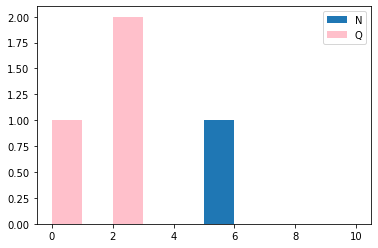

In [180]:
df1 =df[df['Quote']==0][:]
df0 = df1[df1['Day']=='Wed'][:]
df2 = df0.drop(columns = ['Date', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends','Weekend'])
plt.hist(df2['Attributed %'], range=(0,10))

df1 =df[df['Quote']==1][:]
df0 = df1[df1['Day']=='Wed'][:]
df2 = df0.drop(columns = ['Date', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends','Weekend'])
plt.hist(df2['Attributed %'], range=(0,10), color='pink')


plt.legend('NQ')

plt.show()


### Thursday

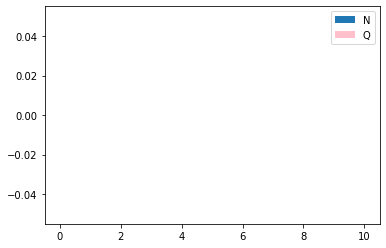

In [181]:
df1 =df[df['Quote']==0][:]
df0 = df1[df1['Day']=='Thursday'][:]
df2 = df0.drop(columns = ['Date', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends','Weekend'])
plt.hist(df2['Attributed %'], range=(0,10))

df1 =df[df['Quote']==1][:]
df0 = df1[df1['Day']=='Thursday'][:]
df2 = df0.drop(columns = ['Date', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends','Weekend'])
plt.hist(df2['Attributed %'], range=(0,10), color='pink')


plt.legend('NQ')

plt.show()


### Friday

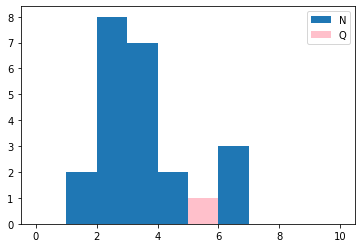

In [182]:
df1 =df[df['Quote']==0][:]
df0 = df1[df1['Day']=='Fri'][:]
df2 = df0.drop(columns = ['Date', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends','Weekend'])
plt.hist(df2['Attributed %'], range=(0,10))

df1 =df[df['Quote']==1][:]
df0 = df1[df1['Day']=='Fri'][:]
df2 = df0.drop(columns = ['Date', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends','Weekend'])
plt.hist(df2['Attributed %'], range=(0,10), color='pink')


plt.legend('NQ')

plt.show()


# Which Day is Better at Creating a Response?

In [269]:
df= pandas.read_csv('Quotes.csv')

In [270]:
def Sat(s):
    if s == 'Sat':
        return 1
    else:
        return 0
    
def Sun(s):
    if s == 'Sun':
        return 1
    else:
        return 0
    
def Mon(s):
    if s == 'Mon':
        return 1
    else:
        return 0
    
    
def Tues(s):
    if s == 'Tues':
        return 1
    else:
        return 0
    
    
def Wed(s):
    if s == 'Wed':
        return 1
    else:
        return 0
    
    
def Thurs(s):
    if s == 'Thurs':
        return 1
    else:
        return 0
    
def Fri(s):
    if s == 'Fri':
        return 1
    else:
        return 0

In [271]:
df['Sat']= df['Day'].map(Sat)
df['Sun']= df['Day'].map(Sun)
df['Mon']= df['Day'].map(Mon)
df['Tues']= df['Day'].map(Tues)
df['Wed']= df['Day'].map(Wed)
df['Thurs']= df['Day'].map(Thurs)
df['Fri']= df['Day'].map(Fri)

## Direct %

In [300]:
print('mean, median')
mean1=[]
median1=[]
for day in ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']:
    df1 =df[df[day]==1][:]
    df2 = df1.drop(columns = ['Date','Quote', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri'])
    print(day)
    mean1.append(df2['Direct %'].mean())
    median1.append(statistics.median(df2['Direct %']))
    print('{:.2f}'.format(df2['Direct %'].mean()), '{:.2f}'.format(statistics.median(df2['Direct %'])))

mean, median
Sun
1.55 1.55
Mon
1.32 1.20
Tues
1.66 1.50
Wed
1.10 1.00
Thurs
1.75 1.50
Fri
1.36 1.35
Sat
1.00 1.00


## Attributued %

In [297]:
print('mean, median')
mean=[]
median=[]
for day in ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']:
    df1 =df[df[day]==1][:]
    df2 = df1.drop(columns = ['Date','Quote', 'Total Alerting Sends','Direct #', 'Attributed #', 'Text','Silent Sends', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri'])
    print(day)
    mean.append(df2['Attributed %'].mean())
    median.append(statistics.median(df2['Attributed %']))
    print('{:.2f}'.format(df2['Attributed %'].mean()), '{:.2f}'.format(statistics.median(df2['Attributed %'])))

mean, median
Sun
3.10 3.10
Mon
3.17 2.70
Tues
3.52 3.20
Wed
2.75 2.90
Thurs
4.23 2.60
Fri
3.63 3.30
Sat
1.60 1.60


# Visually

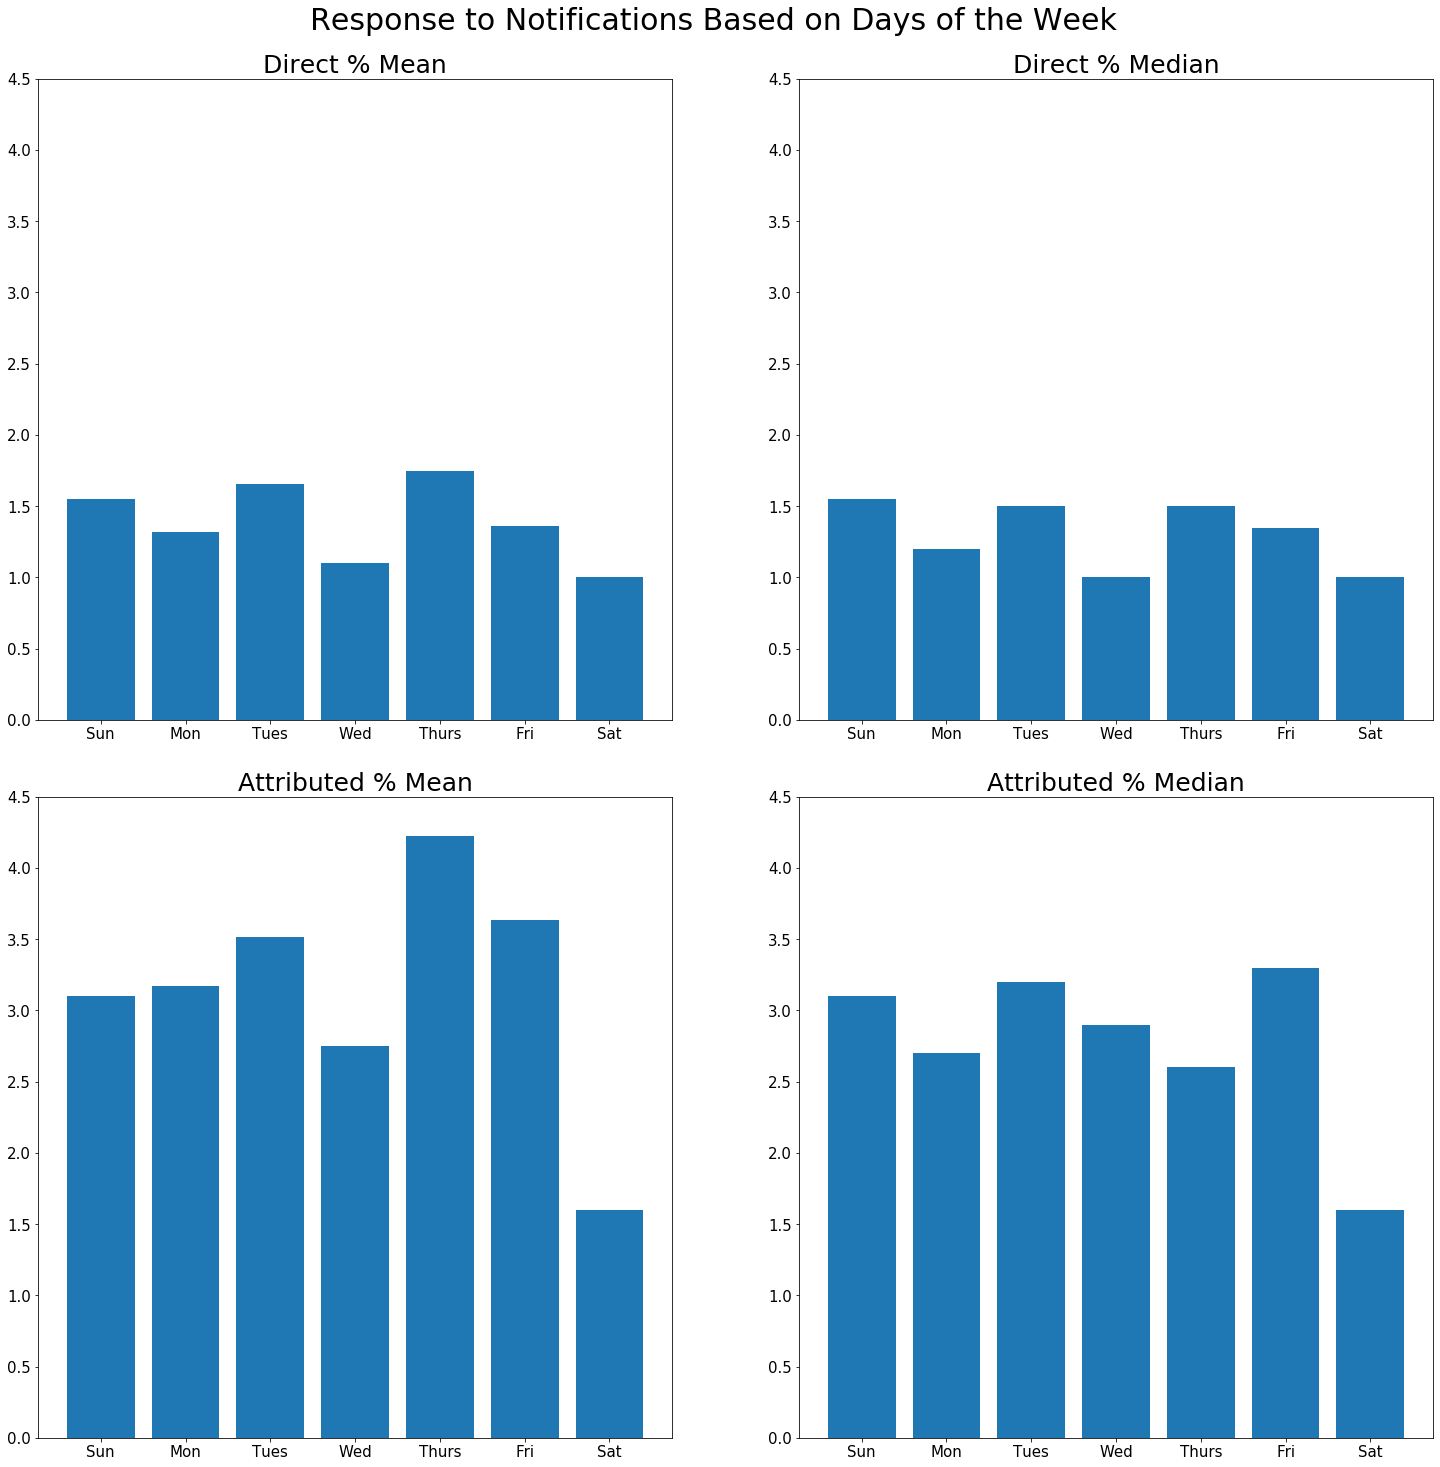

In [321]:
x=np.arange(7)
xaxs = 0
yaxs = 0

fig, axs = plt.subplots(2, 2, figsize=(25, 25))
fig.suptitle('Response to Notifications Based on Days of the Week', 
             fontsize=30,y=.92)

data=[mean1, median1, mean, median]
label=['Direct % Mean', 'Direct % Median', 'Attributed % Mean', 'Attributed % Median']
for n in [0,1,2,3]:

    axs[xaxs, yaxs].bar(x, data[n])
    axs[xaxs, yaxs].set_title(label[n],fontsize=25)
    axs[xaxs, yaxs].tick_params(labelsize=15)

    
    yaxs +=1
    if yaxs == 2:
        yaxs = 0
        xaxs +=1
plt.subplots_adjust(hspace=.12)  
plt.setp(axs, xticklabels=[0, 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'], yticks=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5])
plt.show()

Direct % mean and median are relatively similar, indicating that the data is not that scattered. We can conclude that Monday, Wednesday, and Saturday are the days of least engagement, while Tuesday, Thursday, and Sunday are have the most engagement.

Attributed % has a little more scattered results. We can see that for the days Monday, Tuesday, and Friday the mean is greater than the median by approximate 0.5%, and Thursday's mean is greater than its median by 1.5%. This indicates that on days of engagement, there is heavy engagement, but overall attributed % is generally lower. 

When looking back at the acutal dataset, we can see that the anamoly is in the datapoint for July 18, 2019, which is the second highest Attributed %, and is explained by the fact that since number of users were significatnly lower, the percentage each contributed was higher. 